# Real-time Election Results: Portugal 2019 Data Set



Data Set Information:

A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.

Attribute Information:

TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition

time (timestamp): Date and time of the data acquisition

territoryName (string): Short name of the location (district or nation-wide)

totalMandates (numeric): MP's elected at the moment

availableMandates (numeric): MP's left to elect at the moment

numParishes (numeric): Total number of parishes in this location

numParishesApproved (numeric): Number of parishes approved in this location

blankVotes (numeric): Number of blank votes

blankVotesPercentage (numeric): Percentage of blank votes

nullVotes (numeric): Number of null votes

nullVotesPercentage (numeric): Percentage of null votes

votersPercentage (numeric): Percentage of voters

subscribedVoters (numeric): Number of subscribed voters in the location

totalVoters (numeric): Percentage of blank votes

pre.blankVotes (numeric): Number of blank votes (previous election)

pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)

pre.nullVotes (numeric): Number of null votes (previous election)

pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)

pre.votersPercentage (numeric): Percentage of voters (previous election)

pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)

pre.totalVoters (numeric): Percentage of blank votes (previous election)

Party (string): Political Party

Mandates (numeric): MP's elected at the moment for the party in a given district

Percentage (numeric): Percentage of votes in a party

validVotesPercentage (numeric): Percentage of valid votes in a party

Votes (numeric): Percentage of party votes

Hondt (numeric): Number of MP's according to the distribution of votes now

FinalMandates (numeric): Target: final number of elected MP's in a district/national-level



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
df=pd.read_csv('election.csv')
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,06-10-2019 20:10,Territory National,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


Top 5 heads of the dataset

In [4]:
df.tail()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
1208,15,06-10-2019 20:25,Beja,0,3,75,23,125,1.69,136,...,58.12,15357,8926,IL,0,0.39,0.41,29,0,0
1209,15,06-10-2019 20:25,Beja,0,3,75,23,125,1.69,136,...,58.12,15357,8926,A,0,0.30,0.31,22,0,0
1210,15,06-10-2019 20:25,Beja,0,3,75,23,125,1.69,136,...,58.12,15357,8926,MPT,0,0.27,0.28,20,0,0
1211,15,06-10-2019 20:25,Beja,0,3,75,23,125,1.69,136,...,58.12,15357,8926,PDR,0,0.20,0.21,15,0,0
1212,15,06-10-2019 20:25,Beja,0,3,75,23,125,1.69,136,...,58.12,15357,8926,PNR,0,0.16,0.17,12,0,0


Bottom 5 of the datasets

# EDA

In [5]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               1213 non-null   int64  
 1   time                      1213 non-null   object 
 2   territoryName             1213 non-null   object 
 3   totalMandates             1213 non-null   int64  
 4   availableMandates         1213 non-null   int64  
 5   numParishes               1213 non-null   int64  
 6   numParishesApproved       1213 non-null   int64  
 7   blankVotes                1213 non-null   int64  
 8   blankVotesPercentage      1213 non-null   float64
 9   nullVotes                 1213 non-null   int64  
 10  nullVotesPercentage       1213 non-null   float64
 11  votersPercentage          1213 non-null   float64
 12  subscribedVoters          1213 non-null   int64  
 13  totalVoters               1213 non-null   int64  
 14  pre.blan

We have 8 float type columns , 17 integer type columns and 3 object data type columns present in the datset.

In [6]:
# checking shape
df.shape

(1213, 28)

We 1213 rows and 28 columns present in the datset.

In [7]:
# checking null values
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

There is no null values present in the dataset.

In [9]:
# In totalMandates column there is not any value present ,so we can drop it
df['totalMandates'].unique()

array([0], dtype=int64)

In [4]:
del df['totalMandates']

In [7]:
# In lMandates column there is not any value present ,so we can drop it
df['Mandates'].unique()

array([0], dtype=int64)

In [8]:
del df['Mandates']

In [9]:
# checking shapes again
df.shape

(1213, 26)

In [10]:
# Extracting hour and minute from time column
df['hour']=pd.to_datetime(df['time']).dt.hour
df['min']=pd.to_datetime(df['time']).dt.minute

In [11]:
# now we can delete time column because date, month and year is same for all
del df['time']

In [12]:
df

,TimeElapsed,territoryName,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.subscribedVoters,pre.totalVoters,Party,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,hour,min
0,0,Territory National,226,3092,1081,9652,2.50,8874,2.30,51.36,...,813743,428546,PS,38.29,40.22,147993,94,106,20,10
1,0,Territory National,226,3092,1081,9652,2.50,8874,2.30,51.36,...,813743,428546,PPD/PSD,33.28,34.95,128624,81,77,20,10
2,0,Territory National,226,3092,1081,9652,2.50,8874,2.30,51.36,...,813743,428546,B.E.,6.81,7.15,26307,16,19,20,10
3,0,Territory National,226,3092,1081,9652,2.50,8874,2.30,51.36,...,813743,428546,CDS-PP,4.90,5.14,18923,12,5,20,10
4,0,Territory National,226,3092,1081,9652,2.50,8874,2.30,51.36,...,813743,428546,PCP-PEV,4.59,4.83,17757,11,12,20,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,15,Beja,3,75,23,125,1.69,136,1.84,52.24,...,15357,8926,IL,0.39,0.41,29,0,0,20,25
1209,15,Beja,3,75,23,125,1.69,136,1.84,52.24,...,15357,8926,A,0.30,0.31,22,0,0,20,25
1210,15,Beja,3,75,23,125,1.69,136,1.84,52.24,...,15357,8926,MPT,0.27,0.28,20,0,0,20,25
1211,15,Beja,3,75,23,125,1.69,136,1.84,52.24,...,15357,8926,PDR,0.20,0.21,15,0,0,20,25


Now finally we have 1213 rows and 28 columns.

# VISUALIZATION OF NOMINAL DATA BY COUNT PLOT

In [19]:
df.columns

Index(['TimeElapsed', 'territoryName', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'blankVotesPercentage',
       'nullVotes', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates', 'hour', 'min'],
      dtype='object')

0     386
5     386
10    386
15     55
Name: TimeElapsed, dtype: int64


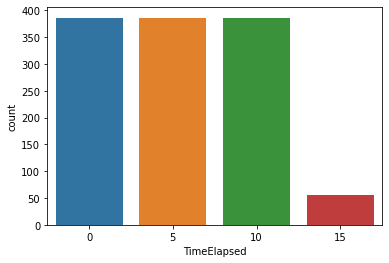

In [20]:
ax=sns.countplot(x='TimeElapsed',data=df)
print(df['TimeElapsed'].value_counts())

In TimeElapsed(Time (minutes) passed since the first data acquisition) column  , there is 4 unique values , 0 min, 5 min, 10 min and 15 min.
The number of counts for 0, 5 and 10 minute is same and the number of count for 15 min is vey low.

Territory National    84
Aveiro                80
Beja                  65
Porto                 63
Leiria                63
Braga                 63
Coimbra               60
Viana do Castelo      60
Setabal               60
Madeira               60
Lisboa                60
Viseu                 60
Faro                  57
Avora                 57
Santaraam             57
Guarda                57
Castelo Branco        54
Bragana               54
Portalegre            51
Vila Real             48
Name: territoryName, dtype: int64


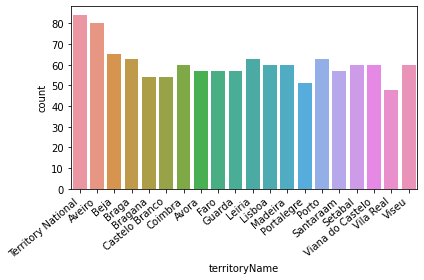

In [22]:
ax=sns.countplot(x='territoryName',data=df)
print(df['territoryName'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

There is not much differnce between the territoryName(Short name of the location) column.

3      233
9      174
6      120
226     84
16      80
10      63
19      63
40      63
8       60
18      60
48      60
4       54
2       51
5       48
Name: availableMandates, dtype: int64


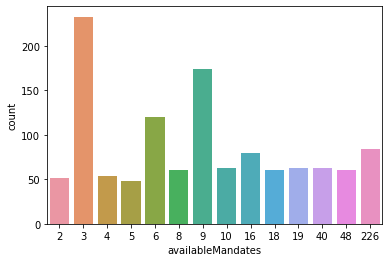

In [24]:
ax=sns.countplot(x='availableMandates',data=df)
print(df['availableMandates'].value_counts())

availableMandates(MP's left to elect at the moment) has many unique values and  the number of count is highest on 3, other than that there is not much noticable diffrence.

69      108
3092     84
147      80
75       65
110      63
243      63
347      63
134      60
55       60
155      60
208      60
277      60
54       60
67       57
141      57
242      57
120      54
226      54
197      48
Name: numParishes, dtype: int64


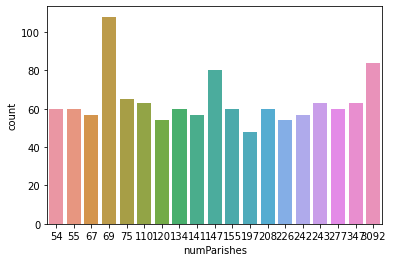

In [27]:
ax=sns.countplot(x='numParishes',data=df)
print(df['numParishes'].value_counts())

numParishes (otal number of parishes in this location) is almost looking normal.

12      143
21      120
23      116
96      114
918      63
61       63
3        60
153      60
32       60
6        60
173      57
40       57
15       57
73       54
9        40
94       32
1081     21
11       20
83       16
Name: numParishesApproved, dtype: int64


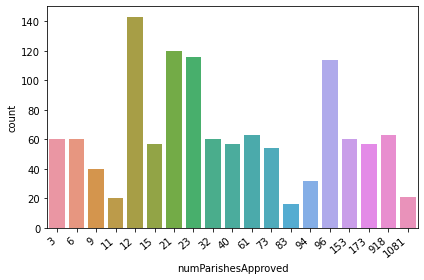

In [29]:
ax=sns.countplot(x='numParishesApproved',data=df)
print(df['numParishesApproved'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

In numParishesApproved(Number of parishes approved in this location) column data is not looking normal , the highest is 12 with 143 values and the lowest is 83 with 16 values.

186     80
125     65
291     63
223     63
7225    63
888     63
903     60
376     60
1485    60
127     60
40      60
239     57
138     57
609     57
735     57
268     54
593     54
136     51
19      40
584     32
9652    21
39      20
453     16
Name: blankVotes, dtype: int64


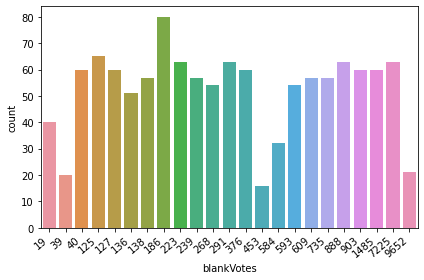

In [31]:
ax=sns.countplot(x='blankVotes',data=df)
print(df['blankVotes'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

There is very high amout of  Number of blank votes present in the blankVotes column.

2.89    123
2.49    120
2.92     80
1.69     65
1.93     63
3.87     63
2.78     60
2.60     60
1.41     60
3.50     60
2.65     57
1.72     57
3.26     57
1.91     54
2.36     54
1.86     51
0.59     40
2.04     32
2.50     21
0.55     20
1.98     16
Name: blankVotesPercentage, dtype: int64


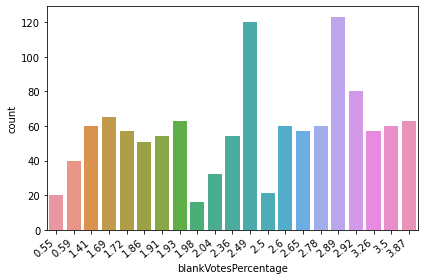

In [33]:
ax=sns.countplot(x='blankVotesPercentage',data=df)
print(df['blankVotesPercentage'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

In blankVotesPercentage(Percentage of blank votes) is not much.

101     80
136     65
176     63
1029    63
6868    63
230     63
39      60
547     60
284     60
114     60
1242    60
149     57
495     57
828     57
108     57
323     54
740     54
139     51
60      40
779     32
8874    21
117     20
618     16
Name: nullVotes, dtype: int64


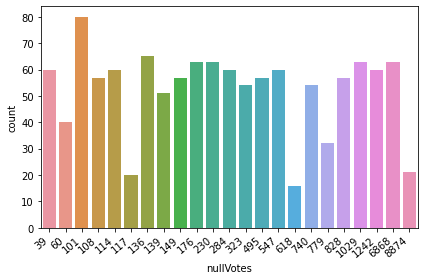

In [35]:
ax=sns.countplot(x='nullVotes',data=df)
print(df['nullVotes'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

nullVotes is showing more number of Number of null votes.

1.59    80
2.30    75
1.84    65
3.35    63
2.37    63
1.99    63
2.34    63
2.49    60
1.75    60
2.17    60
2.65    60
1.38    60
1.34    57
2.81    57
2.03    57
2.16    57
2.95    54
1.90    51
1.88    40
2.72    32
1.65    20
2.70    16
Name: nullVotesPercentage, dtype: int64


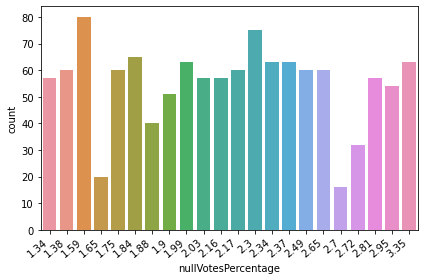

In [37]:
ax=sns.countplot(x='nullVotesPercentage',data=df)
print(df['nullVotesPercentage'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

nullVotesPercentage column is indicating  Percentage of null votes is high.

53.30    80
52.24    65
54.31    63
55.96    63
50.63    63
57.16    63
55.33    60
49.12    60
51.33    60
49.57    60
47.90    60
55.48    57
48.50    57
56.78    57
52.16    57
42.88    54
53.19    54
57.36    51
46.69    40
44.04    32
51.36    21
51.16    20
42.94    16
Name: votersPercentage, dtype: int64


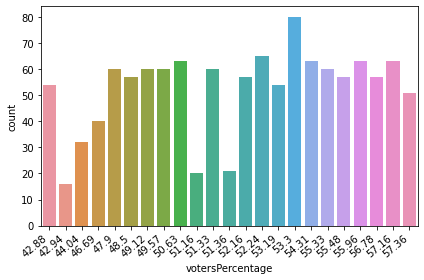

In [40]:
ax=sns.countplot(x='votersPercentage',data=df)
print(df['votersPercentage'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

votersPercentage columns is showing  Percentage of voters is high.

11953     80
14136     65
573021    63
53691     63
21271     63
13439     63
8265      60
20899     60
115266    60
65198     60
5767      60
14071     57
14494     57
60818     57
40414     57
32796     54
47149     54
12730     51
6848      40
65127     32
752529    21
13838     20
53405     16
Name: subscribedVoters, dtype: int64


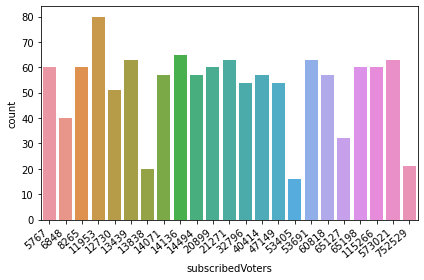

In [42]:
ax=sns.countplot(x='subscribedVoters',data=df)
print(df['subscribedVoters'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

subscribedVoters column is indicating Number of subscribed voters in the location is high except 3 to 4 location.

6371      80
7384      65
30689     63
290114    63
11553     63
7520      63
31229     60
2833      60
57142     60
10728     60
4573      60
7340      57
22948     57
8041      57
29494     57
25078     54
14064     54
7302      51
3197      40
28685     32
386497    21
7080      20
22931     16
Name: totalVoters, dtype: int64


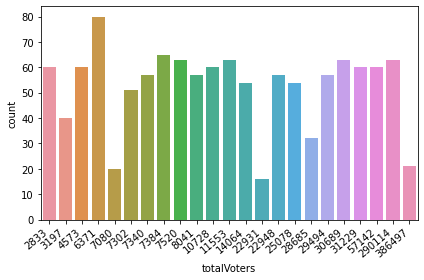

In [44]:
ax=sns.countplot(x='totalVoters',data=df)
print(df['totalVoters'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

totalVoters column is indiacting Percentage of blank votes is high except 3 to 4 location.  

B.E.         63
PS           63
PPD/PSD      63
CH           63
PAN          63
PCP-PEV      63
PCTP/MRPP    63
PNR          63
A            63
IL           63
L            63
CDS-PP       63
PDR          63
PPM          59
R.I.R.       59
MPT          57
PTP          56
PURP         56
NC           56
JPP          29
MAS          22
Name: Party, dtype: int64


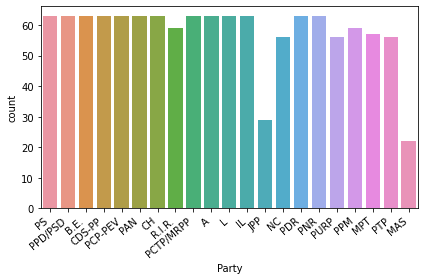

In [48]:
ax=sns.countplot(x='Party',data=df)
print(df['Party'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Party column is indiacting Political Party looking approx same except 2 bars.

0     997
1      67
2      35
3      35
4      18
7      11
5       9
20      6
9       6
12      4
16      4
94      4
15      3
17      3
8       3
82      3
10      3
11      1
81      1
Name: Hondt, dtype: int64


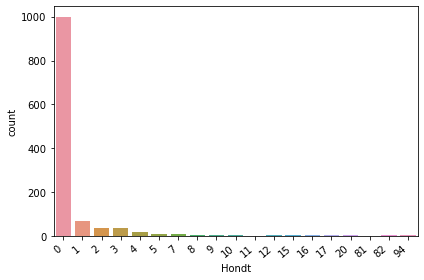

In [54]:
ax=sns.countplot(x='Hondt',data=df)
print(df['Hondt'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Hondt column is indiacting Number of MP's according to the distribution of votes now very less.

# CHECKING THE DISTRIBUTION

In [57]:
df.columns

Index(['TimeElapsed', 'territoryName', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'blankVotesPercentage',
       'nullVotes', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates', 'hour', 'min'],
      dtype='object')

<AxesSubplot:xlabel='pre.blankVotesPercentage', ylabel='Density'>

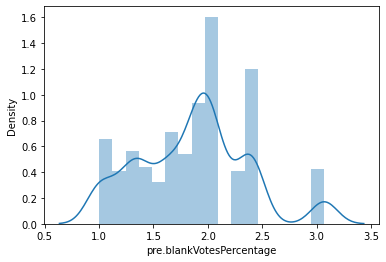

In [68]:
sns.distplot(df['pre.blankVotesPercentage'],kde=True)

distribution plot is showing ranges in between 0.5 to 3.5 in two groups 1.0 to 2.5 is high and approx 2.5 to 3.0 is less.

<AxesSubplot:xlabel='pre.nullVotesPercentage', ylabel='Density'>

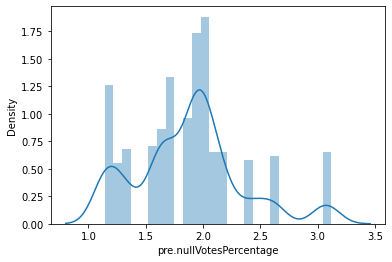

In [71]:
sns.distplot(df['pre.nullVotesPercentage'],kde=True)

distribution plot is showing  ranges in between 1.0 to 3.5 in two groups that is approx 1.2 to approx 3.0 is high .

<AxesSubplot:xlabel='pre.votersPercentage', ylabel='Density'>

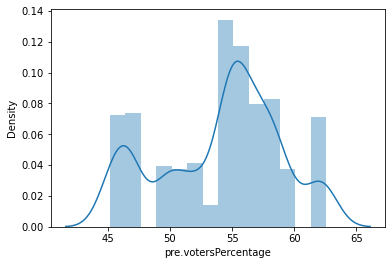

In [72]:
sns.distplot(df['pre.votersPercentage'],kde=True)

distribution plot is not looking normal.

<AxesSubplot:xlabel='Votes', ylabel='Density'>

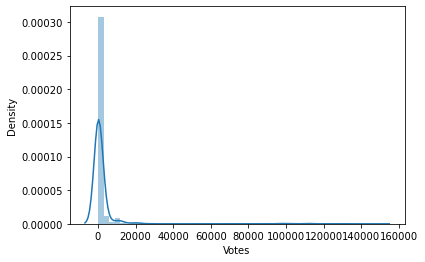

In [78]:
sns.distplot(df['Votes'],kde=True)

Votes column in range between 0 to 16000 and distribution is showing some curve in between 0 to 20000.

# ENCODING THE DATAFRAME TO CONVERT STRING COLUMNS TO NUMERIC COLUMNS

In [22]:
from sklearn.preprocessing import OrdinalEncoder

enc =OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df

,TimeElapsed,territoryName,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.subscribedVoters,pre.totalVoters,Party,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,hour,min
0,0,16.0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,813743,428546,17.0,38.29,40.22,147993,94,106,20,10
1,0,16.0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,813743,428546,15.0,33.28,34.95,128624,81,77,20,10
2,0,16.0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,813743,428546,1.0,6.81,7.15,26307,16,19,20,10
3,0,16.0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,813743,428546,2.0,4.90,5.14,18923,12,5,20,10
4,0,16.0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,813743,428546,11.0,4.59,4.83,17757,11,12,20,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,15,2.0,3,75,23,125,1.69,136,1.84,52.24,...,15357,8926,4.0,0.39,0.41,29,0,0,20,25
1209,15,2.0,3,75,23,125,1.69,136,1.84,52.24,...,15357,8926,0.0,0.30,0.31,22,0,0,20,25
1210,15,2.0,3,75,23,125,1.69,136,1.84,52.24,...,15357,8926,8.0,0.27,0.28,20,0,0,20,25
1211,15,2.0,3,75,23,125,1.69,136,1.84,52.24,...,15357,8926,13.0,0.20,0.21,15,0,0,20,25


Now object data type column is converted into numeric column.

# Checking outliers

TimeElapsed                     AxesSubplot(0.125,0.71587;0.0945122x0.16413)
territoryName                AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
availableMandates            AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
numParishes                  AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
numParishesApproved          AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
blankVotes                   AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
blankVotesPercentage         AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
nullVotes                      AxesSubplot(0.125,0.518913;0.0945122x0.16413)
nullVotesPercentage         AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
votersPercentage            AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
subscribedVoters            AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
totalVoters                 AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
pre.blankVotes              AxesSubplot(0.692073,0.518913;0.0945122x0.16413)

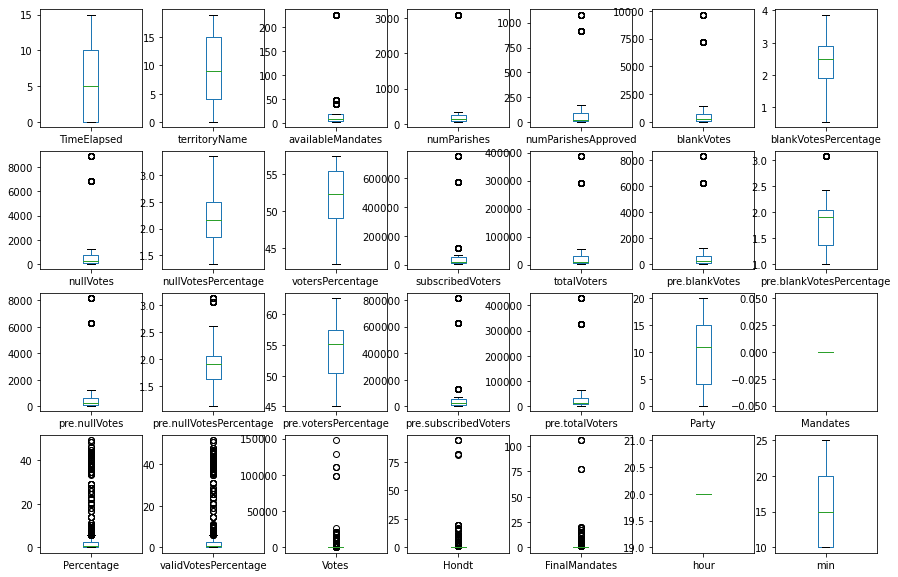

In [81]:
df.plot(kind='box', subplots=True ,layout=(4,7),figsize=(15,10))

Outliers is present in most of the columns.

# checking skewness

In [82]:
df.skew()

TimeElapsed                  0.194824
territoryName               -0.020898
availableMandates            3.150671
numParishes                  3.331221
numParishesApproved          3.213943
blankVotes                   3.337157
blankVotesPercentage        -0.318427
nullVotes                    3.300560
nullVotesPercentage          0.354393
votersPercentage            -0.583412
subscribedVoters             3.339282
totalVoters                  3.363404
pre.blankVotes               3.337629
pre.blankVotesPercentage     0.284943
pre.nullVotes                3.317669
pre.nullVotesPercentage      0.526896
pre.votersPercentage        -0.322504
pre.subscribedVoters         3.320195
pre.totalVoters              3.353057
Party                       -0.081119
Mandates                     0.000000
Percentage                   2.643957
validVotesPercentage         2.643818
Votes                       11.076198
Hondt                       10.473167
FinalMandates               11.079035
hour        

columns is in range between +.5 and -.5 are not skewed.

skewed columns are:
    
    availableMandates 
    
    numParishes
    
    numParishesApproved 
    
    blankVotes
    
    nullVotes
    
    subscribedVoters 
    
    totalVoters  
    
    pre.blankVotes 
    
    pre.nullVotes
    
    pre.subscribedVoters 
    
    pre.totalVoters
    
    Percentage 
    
    validVotesPercentage 
    
    Votes
    
    Hondt
    
    FinalMandates
    
    
    We will not treat skewness on  object dataype , nominal datatype and target column.
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

# Statistical Summary

In [13]:
df.describe()

,TimeElapsed,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,hour,min
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.0,1213.000000
mean,5.453421,26.870569,358.355317,111.887881,926.678483,2.411319,868.944765,2.183735,51.861204,72650.773289,...,54.099275,79257.338829,41343.248969,4.956059,5.193355,1739.174773,1.307502,1.307502,20.0,15.453421
std,4.500698,55.618238,750.239047,236.571623,1937.646076,0.751206,1820.497416,0.514144,3.959896,152555.910698,...,4.876772,166293.969636,86681.128053,10.931462,11.456085,9611.501174,7.502381,7.814701,0.0,4.500698
min,0.000000,2.000000,54.000000,3.000000,19.000000,0.550000,39.000000,1.340000,42.880000,5767.000000,...,45.140000,6383.000000,3215.000000,0.020000,0.020000,1.000000,0.000000,0.000000,20.0,10.000000
25%,0.000000,4.000000,75.000000,12.000000,138.000000,1.910000,117.000000,1.840000,49.120000,13439.000000,...,50.380000,14191.000000,8146.000000,0.220000,0.220000,26.000000,0.000000,0.000000,20.0,10.000000
50%,5.000000,9.000000,147.000000,23.000000,268.000000,2.490000,230.000000,2.160000,52.240000,20899.000000,...,55.080000,22356.000000,12251.000000,0.520000,0.540000,89.000000,0.000000,0.000000,20.0,15.000000
75%,10.000000,18.000000,242.000000,96.000000,735.000000,2.890000,740.000000,2.490000,55.330000,53691.000000,...,57.400000,57540.000000,31957.000000,2.390000,2.500000,492.000000,0.000000,0.000000,20.0,20.000000
max,15.000000,226.000000,3092.000000,1081.000000,9652.000000,3.870000,8874.000000,3.350000,57.360000,752529.000000,...,62.580000,813743.000000,428546.000000,49.110000,51.420000,147993.000000,94.000000,106.000000,20.0,25.000000


The number of count is samem for every column.

There is difference between mean and mmedian(50%) in some of the columns.

Data is deviated in some of the columns.

There is some difference between 75% and max in some of the columns means outliers is present.

# checking correlations

<AxesSubplot:>

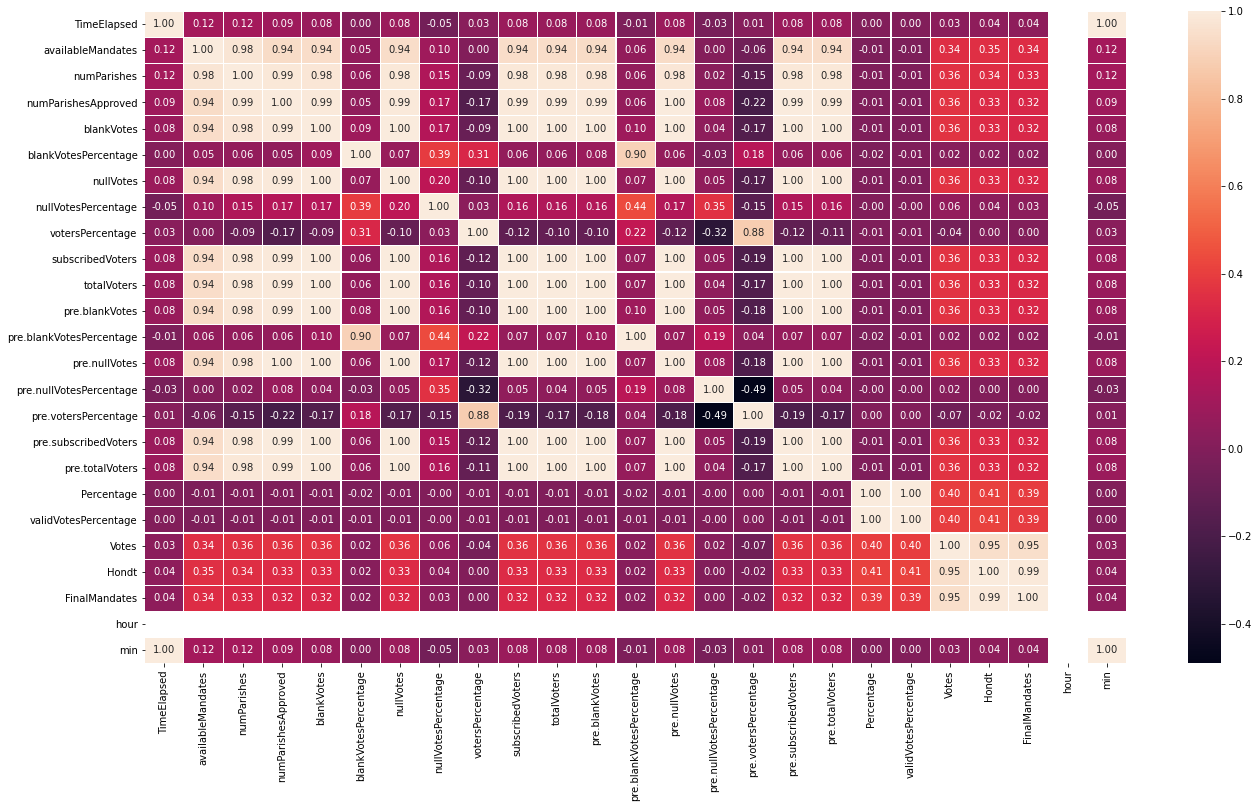

In [19]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths =0.1,fmt='0.2f')

Votes and Hondt columns are positively correlated with the target columns FinalMandates.

TimeElapsed column and some more columns are negatively correlated with the target column FinalMandates.

# Outlier Removal

In [20]:
from scipy.stats import zscore

In [24]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    0,    0, ..., 1179, 1199, 1199], dtype=int64),
 array([ 2,  3,  4, ..., 20, 20, 21], dtype=int64))

In [25]:
df_new=df[(z<3).all(axis=1)]
df_new

,TimeElapsed,territoryName,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.subscribedVoters,pre.totalVoters,Party,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,hour,min


 so during oulier removal all columns is becoming 0 , so we will not consider this process further.

# SEPRATING THE COLUMNS INTO X AND Y

In [27]:
x=df.drop('FinalMandates',axis=1)
y=df['FinalMandates']

In [28]:
x.shape

(1213, 26)

In [29]:
y.shape

(1213,)

# TRAIN TEST SPLIT

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(946, 26)
(267, 26)
(946,)
(267,)


# Model Building

In [31]:
# importing libraries
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [32]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.9837816706453597
error
mean absolute error 0.3081775521502891
mean squared error 1.1110764776531368
root mean squared error 1.0540761251698745


In [33]:
# For Linear Regression (cross validation)


score=cross_val_score(lr,x,y,cv=10)
print('cv score',np.mean(score))


cv score 0.9702177736222103


so r2 score is 98.37% and cv score is 97.02.

In [35]:
# For ridge
rd=Ridge()
rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score', r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.9837793012274395
error
mean absolute error 0.3084397873599979
mean squared error 1.1112388004460234
root mean squared error 1.0541531200191097


In [36]:
# Ridge cross validation
score=cross_val_score(rd,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9703207748816268


r2 score is 98.37% and cv score is 97.03%

In [38]:
# for lasso
ls=Lasso()
ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))
print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared errot',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.9751514048242576
error
mean absolute error 0.4466056106010034
mean squared errot 1.7023140299338713
root mean squared error 1.3047275692395985


In [39]:
# lasso cv score
score=cross_val_score(ls,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.949741062670781


r2 score is 97.51% and cv score is 94.97%.

In [44]:
# for elasticnet
enc=ElasticNet()
enc.fit(x_train,y_train)
pred_y=enc.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))
print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.9767341088017742
error
mean absolute error 0.4285630363493698
mean squared error 1.5938870075165643
root mean squared error 1.2624923791914802


In [48]:
# elastic net cross val score
score=cross_val_score(enc,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9562853657434867


r2 score is 97.67 and cv score is 95.62.

# ENSEMBLE TECHNIQUE for getting better prediction

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [53]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2 score: 99.36409939293522
cross val score: 99.83183329088666


After applying ensemble techniques r2 score is 99.36% and cv score is 99.83% , it means the performance of our model is extremly well.

# SAVING THE MODEL

In [54]:
import pickle
filename='election_result.pkl'
pickle.dump(rf,open(filename,'wb'))

# CONCLUSION

In [57]:
loaded_model=pickle.load(open('election_result.pkl','rb'))
result=loaded_model.score(x_test, y_test)
print(result)

0.9936409939293521


In [58]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion
                

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
predicted,0.0,0.28,0.0,0.0,0.51,1.09,0.01,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,2.03,0.0,0.01,0.0,0.0,0.0
original,0.0,0.28,0.0,0.0,0.51,1.09,0.01,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,2.03,0.0,0.01,0.0,0.0,0.0


With the help of Project , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on Average Price.

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.